<a href="https://colab.research.google.com/github/KacperKurzydlo/UdzialBadaniaNaukowe/blob/main/Sie%C4%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import laplace
from scipy.integrate import solve_bvp
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import Input, Sequential

In [3]:
C = 1

def f_x(x, vars):
    X, W = vars
    dX_dx = W
    dW_dw = C * X
    return [dX_dx, dW_dw]

def f_y(y, vars):
    Y, Z = vars
    dY_dy = Z
    dZ_dy = -C * Y
    return [dY_dy, dZ_dy]

def wb_x(vars_a, vars_b, X_p, X_k):
    X_a, W_a = vars_a
    X_b, W_b = vars_b
    return np.array([X_a + X_p, X_b + X_k])

def wb_y(vars_a, vars_b, Y_p, Y_k):
    Y_a, Z_a = vars_a
    Y_b, Z_b = vars_b
    return np.array([Y_a + Y_p, Y_b + Y_k])

In [4]:
boundary_conditions = []
solutions_X = []
solutions_Y = []

for _ in range(100):

    X_p, X_k = np.random.uniform(-5, 5, 2)
    Y_p, Y_k = np.random.uniform(-5, 5, 2)
    boundary_conditions.append([X_p, X_k, Y_p, Y_k])

    x_start = 0
    x_end = 10
    x = np.linspace(x_start, x_end, 100)
    X_guess = np.zeros((2, x.size))

    y_start = 0
    y_end = 10
    y = np.linspace(y_start, y_end, 100)
    Y_guess = np.zeros((2, y.size))

    solution_x = solve_bvp(f_x, lambda vars_a, vars_b: wb_x(vars_a, vars_b, X_p, X_k), x, X_guess)
    solution_y = solve_bvp(f_y, lambda vars_a, vars_b: wb_y(vars_a, vars_b, Y_p, Y_k), y, Y_guess)


    solutions_X.append(solution_x.y[0])
    solutions_Y.append(solution_y.y[0])

boundary_conditions = np.array(boundary_conditions)
solutions_X = np.array(solutions_X)
solutions_Y = np.array(solutions_Y)

In [9]:
model_X = models.Sequential([
    Input(shape=(4,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='linear')
])

model_Y = models.Sequential([
    Input(shape=(4,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(100, activation='linear')
])

model_X.compile(optimizer='adam', loss='mse')
model_Y.compile(optimizer='adam', loss='mse')


model_X.fit(boundary_conditions, solutions_X, epochs=500, validation_split=0.2)
model_Y.fit(boundary_conditions, solutions_Y, epochs=500, validation_split=0.2)

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - loss: 0.8958 - val_loss: 0.9043
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.7605 - val_loss: 0.8087
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.6421 - val_loss: 0.6863
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.5099 - val_loss: 0.5414
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.3853 - val_loss: 0.4139
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.2803 - val_loss: 0.3123
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2034 - val_loss: 0.2160
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.1339 - val_loss: 0.1432
Epoch 9/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0846 - val_loss: 0.0941
Epoch 10/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0565 - val_loss: 0.0640
Epoch 11/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0422 - val_loss: 0.0434
Epoch 12/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0277 - val_l

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


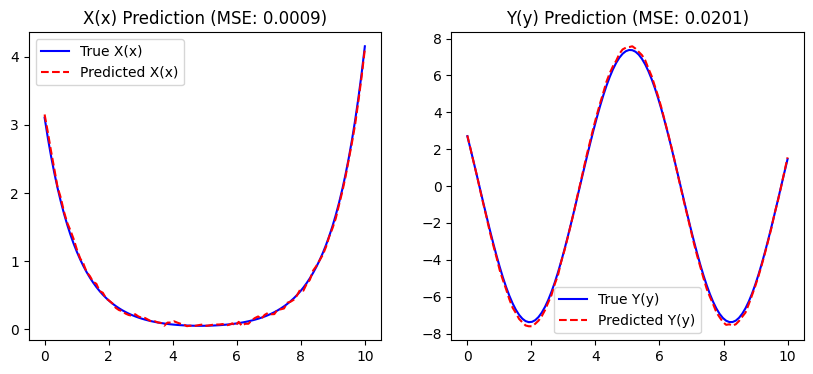

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


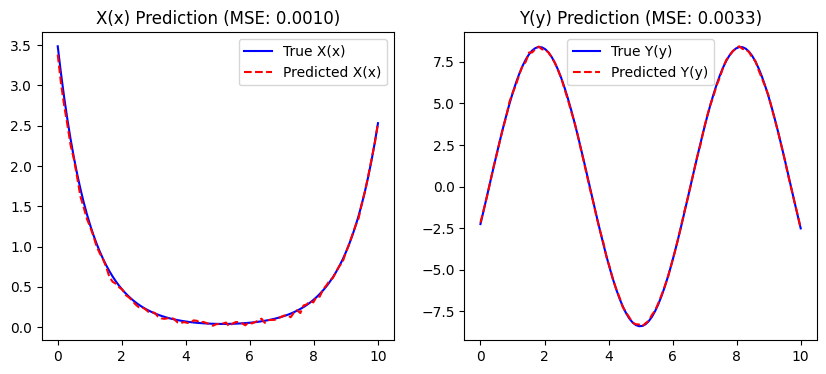

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


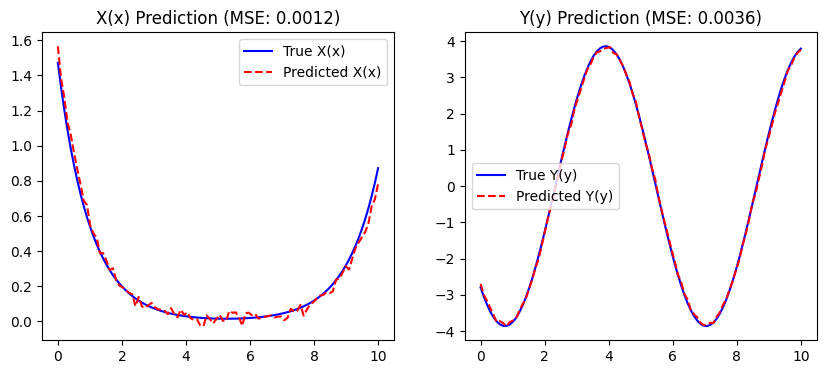

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


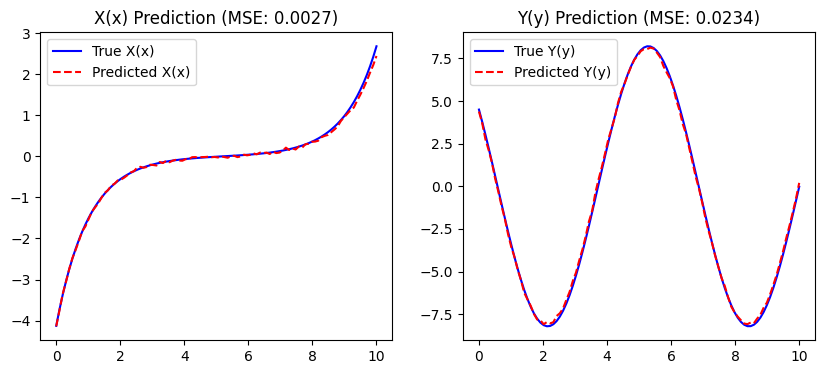

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


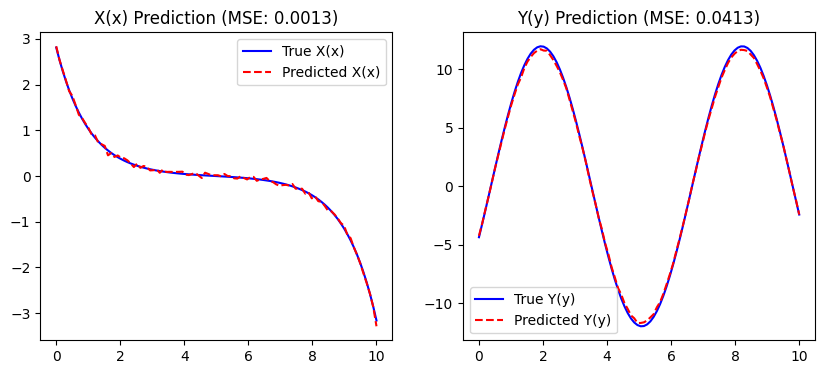

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


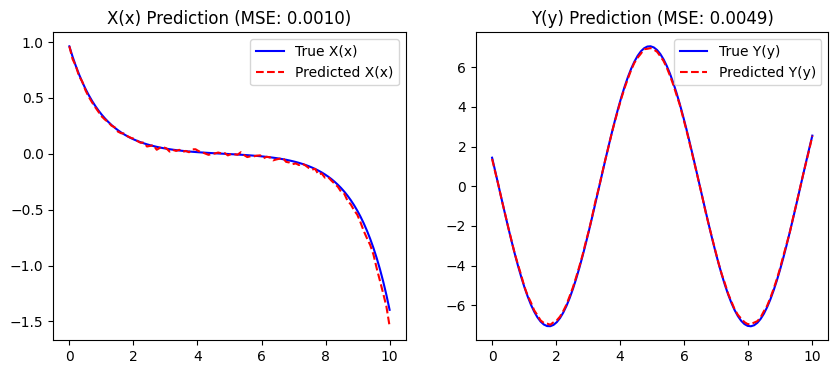

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


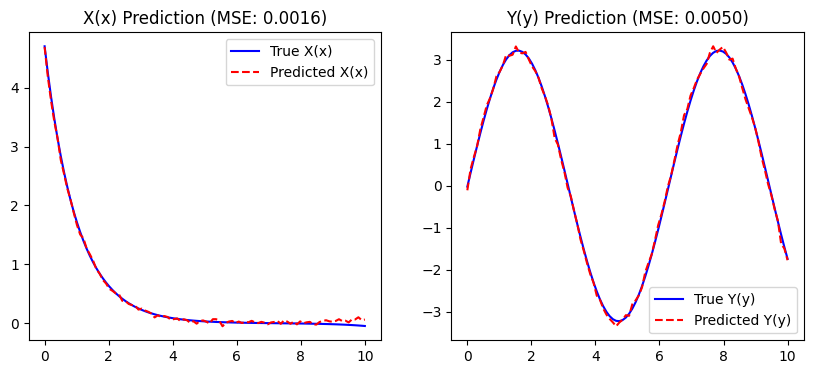

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


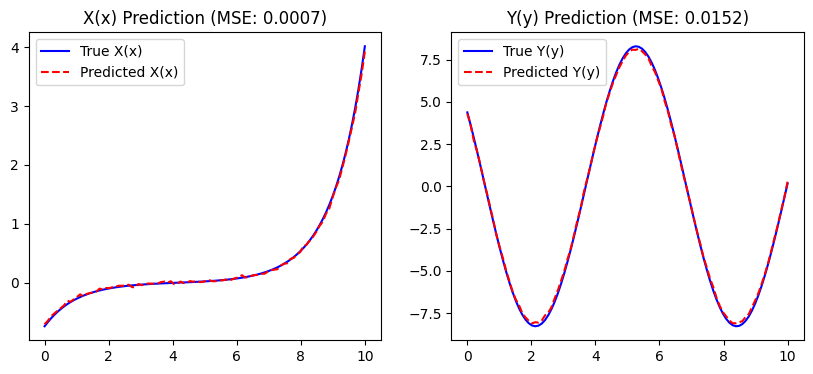

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


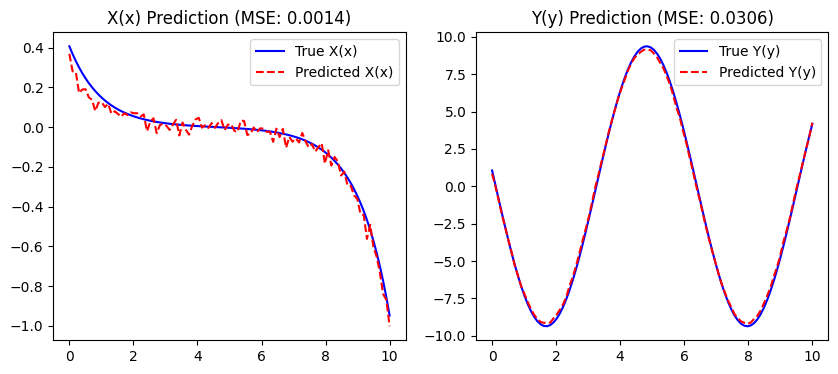

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


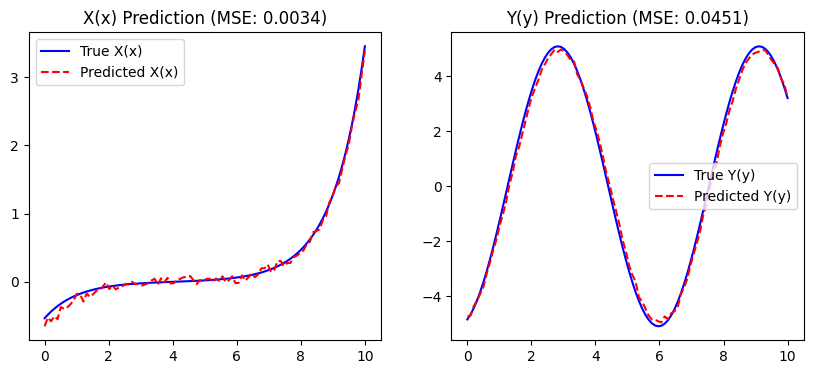

Average MSE for X(x): 0.0015
Average MSE for Y(y): 0.0192


In [11]:
def evaluate_network(model_X, model_Y, num_tests=10):
    errors_X = []
    errors_Y = []

    for _ in range(num_tests):

        X_p, X_k = np.random.uniform(-5, 5, 2)
        Y_p, Y_k = np.random.uniform(-5, 5, 2)
        boundary_conditions = np.array([[X_p, X_k, Y_p, Y_k]])

        pred_X = model_X.predict(boundary_conditions)[0]
        pred_Y = model_Y.predict(boundary_conditions)[0]

        solution_x = solve_bvp(f_x, lambda vars_a, vars_b: wb_x(vars_a, vars_b, X_p, X_k), x, X_guess)
        solution_y = solve_bvp(f_y, lambda vars_a, vars_b: wb_y(vars_a, vars_b, Y_p, Y_k), y, Y_guess)

        true_X = solution_x.y[0]
        true_Y = solution_y.y[0]

        mse_X = np.mean((pred_X - true_X) ** 2)
        mse_Y = np.mean((pred_Y - true_Y) ** 2)
        errors_X.append(mse_X)
        errors_Y.append(mse_Y)

        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.plot(x, true_X, label="True X(x)", color="blue")
        plt.plot(x, pred_X, label="Predicted X(x)", color="red", linestyle="dashed")
        plt.legend()
        plt.title(f"X(x) Prediction (MSE: {mse_X:.4f})")

        plt.subplot(1, 2, 2)
        plt.plot(y, true_Y, label="True Y(y)", color="blue")
        plt.plot(y, pred_Y, label="Predicted Y(y)", color="red", linestyle="dashed")
        plt.legend()
        plt.title(f"Y(y) Prediction (MSE: {mse_Y:.4f})")

        plt.show()

    avg_mse_X = np.mean(errors_X)
    avg_mse_Y = np.mean(errors_Y)

    print(f"Average MSE for X(x): {avg_mse_X:.4f}")
    print(f"Average MSE for Y(y): {avg_mse_Y:.4f}")


evaluate_network(model_X, model_Y)